# Spatial Analysis

## Prepare

In [3]:
!pip install geopandas contextily

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt

## Read Data

### Spatial Data

#### Kabupaten dan Kota

In [5]:
gdf = gpd.read_file(
    filename = './data bersih/kabupaten dan kota di jawa timur.gpkg',
)
gdf.head()

,Tingkat,Wilayah,geometry
0,Kota,Probolinggo,"MULTIPOLYGON (((113.23647 -7.73965, 113.23646 ..."
1,Kabupaten,Jombang,"MULTIPOLYGON (((112.40902 -7.77314, 112.40861 ..."
2,Kota,Kediri,"MULTIPOLYGON (((112.07737 -7.83246, 112.07728 ..."
3,Kota,Blitar,"MULTIPOLYGON (((112.18107 -8.06090, 112.18119 ..."
4,Kabupaten,Jember,"MULTIPOLYGON (((113.26425 -8.48716, 113.26557 ..."


### Persentase Penduduk Berdasarkan Kepemilikan Jaminan Kesehatan

In [6]:
df_jakes_l = pd.read_csv(
    filepath_or_buffer = "./data bersih/persentase laki-laki berdasarkan jaminan kesehatan.csv",
    index_col = 0,
)
df_jakes_l.head()

,Wilayah,Tingkat,Penerima Bantuan Iuran,Non Penerima Bantuan Iuran,Jamkesda,Asuransi Swasta,Perusahaan/Kantor,Tidak Punya
0,Bangkalan,Kabupaten,1249,431,408,0,59,7869
1,Banyuwangi,Kabupaten,2429,1262,9430,46,146,63
2,Blitar,Kabupaten,2629,1184,496,42,129,5602
3,Bojonegoro,Kabupaten,7145,1040,1842,104,37,6
4,Bondowoso,Kabupaten,4892,1038,7,0,73,4021


In [7]:
df_jakes_p = pd.read_csv(
    filepath_or_buffer = "./data bersih/persentase perempuan berdasarkan jaminan kesehatan.csv",
    index_col = 0,
)
df_jakes_p.head()

,Wilayah,Tingkat,Penerima Bantuan Iuran,Non Penerima Bantuan Iuran,Jamkesda,Asuransi Swasta,Perusahaan/Kantor,Tidak Punya
0,Bangkalan,Kabupaten,1461,380,463,0,42,7665
1,Banyuwangi,Kabupaten,2401,1331,9393,49,147,124
2,Blitar,Kabupaten,2929,1082,550,43,65,5459
3,Bojonegoro,Kabupaten,7264,1006,1758,69,30,0
4,Bondowoso,Kabupaten,4928,1007,6,0,71,4005


### Sensus Penduduk

In [8]:
df_sensus = pd.read_csv(
    filepath_or_buffer = "./data bersih/sensus penduduk.csv",
    index_col = 0,
)
df_sensus.head()

,Kode,Tingkat,Wilayah,Laki-laki,Perempuan,Total Jenis Kelamin
0,3501,KABUPATEN,PACITAN,293714,292396,586110
1,3502,KABUPATEN,PONOROGO,474257,475061,949318
2,3503,KABUPATEN,TRENGGALEK,367372,363753,731125
3,3504,KABUPATEN,TULUNGAGUNG,545254,544521,1089775
4,3505,KABUPATEN,BLITAR,616511,607234,1223745


### Covid Cases

In [9]:
df_covid = pd.read_csv(
    filepath_or_buffer = "./data bersih/covid cases.csv",
    index_col = 0,
)
df_covid.head()

,Wilayah,Tingkat,Bergejala,Tanpa Gejala,Tanpa Riwayat,Konfirmasi,Sembuh,Meninggal,Rapid,Rapid Reaktif
0,Bangkalan,Kabupaten,622,955,583,1577,1385,152,18792,1737
1,Banyuwangi,Kabupaten,3587,1849,3036,5436,4810,518,0,0
2,Blitar,Kabupaten,1480,2989,2966,4469,3910,380,36734,813
3,Bojonegoro,Kabupaten,2047,165,1863,2212,2032,127,55806,1262
4,Bondowoso,Kabupaten,1529,628,1354,2157,1972,144,70550,750


### Persentase Ijazah Terakhir

In [10]:
df_ijazah_l = pd.read_csv(
    filepath_or_buffer = "./data bersih/persentase laki-laki berdasarkan ijazah terakhir.csv",
    index_col = 0,
)
df_ijazah_l.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,1896,3907,2050,1668,129,10,0,340
1,Banyuwangi,Kabupaten,1577,2693,2163,2063,647,147,8,703
2,Blitar,Kabupaten,1469,3258,2353,1615,765,47,0,493
3,Bojonegoro,Kabupaten,1457,2874,2198,2289,483,51,0,648
4,Bondowoso,Kabupaten,3061,2499,1391,1758,602,27,0,662


In [11]:
df_ijazah_p = pd.read_csv(
    filepath_or_buffer = "./data bersih/persentase perempuan berdasarkan ijazah terakhir.csv",
    index_col = 0,
)
df_ijazah_p.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,2611,4090,1778,1254,67,35,0,165
1,Banyuwangi,Kabupaten,2471,2569,2021,1786,416,137,16,584
2,Blitar,Kabupaten,1860,2821,2594,1462,533,148,0,583
3,Bojonegoro,Kabupaten,2195,2885,2268,1764,235,96,0,556
4,Bondowoso,Kabupaten,3786,2645,1624,1112,214,42,0,578


## Data Cleaning

### Spatial Data

In [12]:
gdf = gdf[["Wilayah","Tingkat","geometry"]]
gdf = gdf.to_crs(epsg=3857)
gdf = gdf.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
gdf.head()

,Wilayah,Tingkat,geometry
0,Bangkalan,Kabupaten,"MULTIPOLYGON (((12542957.277 -788799.944, 1254..."
1,Banyuwangi,Kabupaten,"MULTIPOLYGON (((12696726.332 -907807.319, 1269..."
2,Blitar,Kabupaten,"MULTIPOLYGON (((12501911.247 -885516.504, 1250..."
3,Bojonegoro,Kabupaten,"MULTIPOLYGON (((12476858.587 -824105.761, 1247..."
4,Bondowoso,Kabupaten,"MULTIPOLYGON (((12715395.598 -891964.419, 1271..."


### Persentase Penduduk Berdasarkan Kepemilikan Jaminan Kesehatan

In [13]:
df_jakes_l = df_jakes_l.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_jakes_l.head()

,Wilayah,Tingkat,Penerima Bantuan Iuran,Non Penerima Bantuan Iuran,Jamkesda,Asuransi Swasta,Perusahaan/Kantor,Tidak Punya
0,Bangkalan,Kabupaten,1249,431,408,0,59,7869
1,Banyuwangi,Kabupaten,2429,1262,9430,46,146,63
2,Blitar,Kabupaten,2629,1184,496,42,129,5602
3,Bojonegoro,Kabupaten,7145,1040,1842,104,37,6
4,Bondowoso,Kabupaten,4892,1038,7,0,73,4021


In [14]:
df_jakes_p = df_jakes_p.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_jakes_p.head()

,Wilayah,Tingkat,Penerima Bantuan Iuran,Non Penerima Bantuan Iuran,Jamkesda,Asuransi Swasta,Perusahaan/Kantor,Tidak Punya
0,Bangkalan,Kabupaten,1461,380,463,0,42,7665
1,Banyuwangi,Kabupaten,2401,1331,9393,49,147,124
2,Blitar,Kabupaten,2929,1082,550,43,65,5459
3,Bojonegoro,Kabupaten,7264,1006,1758,69,30,0
4,Bondowoso,Kabupaten,4928,1007,6,0,71,4005


In [15]:
df_jakes = df_jakes_l.iloc[:,0:2]
df_jakes = df_jakes.join(df_jakes_l.iloc[:,2:] + df_jakes_p.iloc[:,2:])
df_jakes.head()

,Wilayah,Tingkat,Penerima Bantuan Iuran,Non Penerima Bantuan Iuran,Jamkesda,Asuransi Swasta,Perusahaan/Kantor,Tidak Punya
0,Bangkalan,Kabupaten,2710,811,871,0,101,15534
1,Banyuwangi,Kabupaten,4830,2593,18823,95,293,187
2,Blitar,Kabupaten,5558,2266,1046,85,194,11061
3,Bojonegoro,Kabupaten,14409,2046,3600,173,67,6
4,Bondowoso,Kabupaten,9820,2045,13,0,144,8026


### Sensus Penduduk

In [16]:
df_sensus = df_sensus.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_sensus.head()

,Kode,Tingkat,Wilayah,Laki-laki,Perempuan,Total Jenis Kelamin
0,3526,KABUPATEN,BANGKALAN,522782,537595,1060377
1,3510,KABUPATEN,BANYUWANGI,855220,852894,1708114
2,3505,KABUPATEN,BLITAR,616511,607234,1223745
3,3522,KABUPATEN,BOJONEGORO,653686,647949,1301635
4,3511,KABUPATEN,BONDOWOSO,382226,393925,776151


### Covid Cases

In [17]:
df_covid = df_covid.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_covid.head()

,Wilayah,Tingkat,Bergejala,Tanpa Gejala,Tanpa Riwayat,Konfirmasi,Sembuh,Meninggal,Rapid,Rapid Reaktif
0,Bangkalan,Kabupaten,622,955,583,1577,1385,152,18792,1737
1,Banyuwangi,Kabupaten,3587,1849,3036,5436,4810,518,0,0
2,Blitar,Kabupaten,1480,2989,2966,4469,3910,380,36734,813
3,Bojonegoro,Kabupaten,2047,165,1863,2212,2032,127,55806,1262
4,Bondowoso,Kabupaten,1529,628,1354,2157,1972,144,70550,750


### Persentase Ijazah Terakhir

In [18]:
df_ijazah_l = df_ijazah_l.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_ijazah_l.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,1896,3907,2050,1668,129,10,0,340
1,Banyuwangi,Kabupaten,1577,2693,2163,2063,647,147,8,703
2,Blitar,Kabupaten,1469,3258,2353,1615,765,47,0,493
3,Bojonegoro,Kabupaten,1457,2874,2198,2289,483,51,0,648
4,Bondowoso,Kabupaten,3061,2499,1391,1758,602,27,0,662


In [19]:
df_ijazah_p = df_ijazah_p.sort_values(
    by = ["Tingkat", "Wilayah"],
    ignore_index = True,
)
df_ijazah_p.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,2611,4090,1778,1254,67,35,0,165
1,Banyuwangi,Kabupaten,2471,2569,2021,1786,416,137,16,584
2,Blitar,Kabupaten,1860,2821,2594,1462,533,148,0,583
3,Bojonegoro,Kabupaten,2195,2885,2268,1764,235,96,0,556
4,Bondowoso,Kabupaten,3786,2645,1624,1112,214,42,0,578


In [20]:
df_ijazah = df_ijazah_l.iloc[:,0:2]
df_ijazah = df_ijazah.join(df_ijazah_l.iloc[:,2:] + df_ijazah_p.iloc[:,2:])
df_ijazah.head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
0,Bangkalan,Kabupaten,4507,7997,3828,2922,196,45,0,505
1,Banyuwangi,Kabupaten,4048,5262,4184,3849,1063,284,24,1287
2,Blitar,Kabupaten,3329,6079,4947,3077,1298,195,0,1076
3,Bojonegoro,Kabupaten,3652,5759,4466,4053,718,147,0,1204
4,Bondowoso,Kabupaten,6847,5144,3015,2870,816,69,0,1240


## Analysis

<AxesSubplot:>

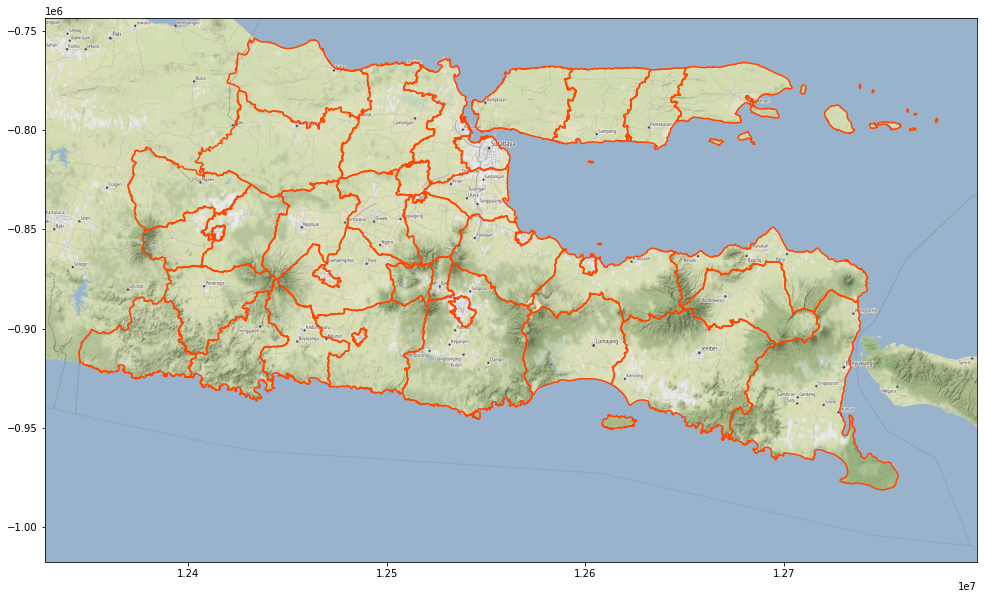

In [21]:
basemap, basemap_extent = contextily.bounds2img(*gdf.total_bounds, zoom=10)

plt.figure(figsize=(20,10))
plt.imshow(basemap, extent=basemap_extent)
gdf.boundary.plot(ax=plt.gca(), color="orangered")

### Neighbors Matrix

In [22]:
df_neighbors = pd.DataFrame()
for index, row in gdf.iterrows():
    df_neighbors[index] = gdf.geometry.distance(row.geometry) == 0
df_neighbors.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Mapping Sensus Penduduk

<AxesSubplot:>

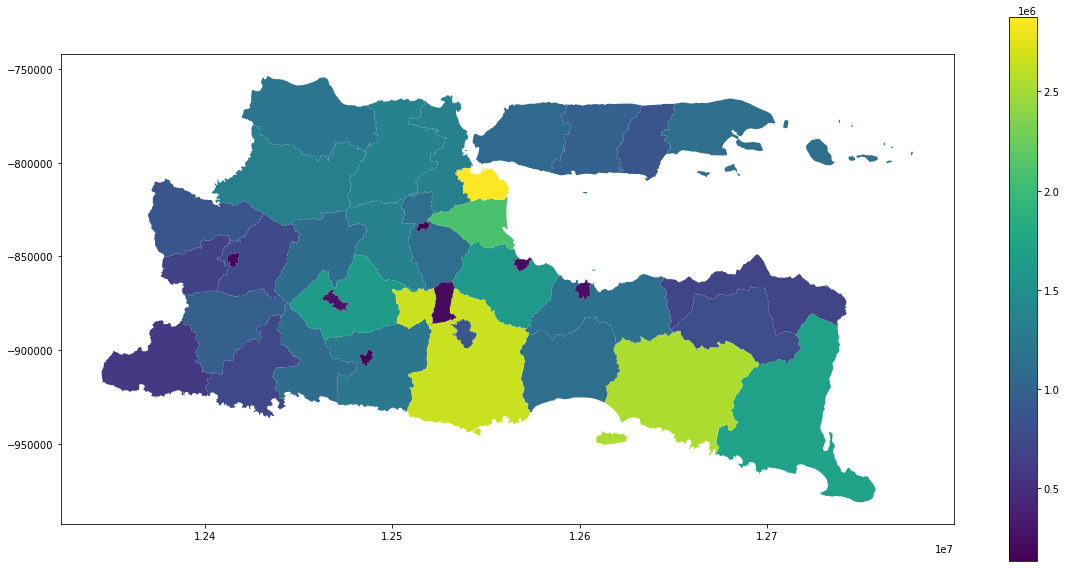

In [23]:
gdf.plot(
    column = df_sensus["Total Jenis Kelamin"],
    legend = True,
    figsize = (20, 10),
)

#### Kepadatan Penduduk

<AxesSubplot:>

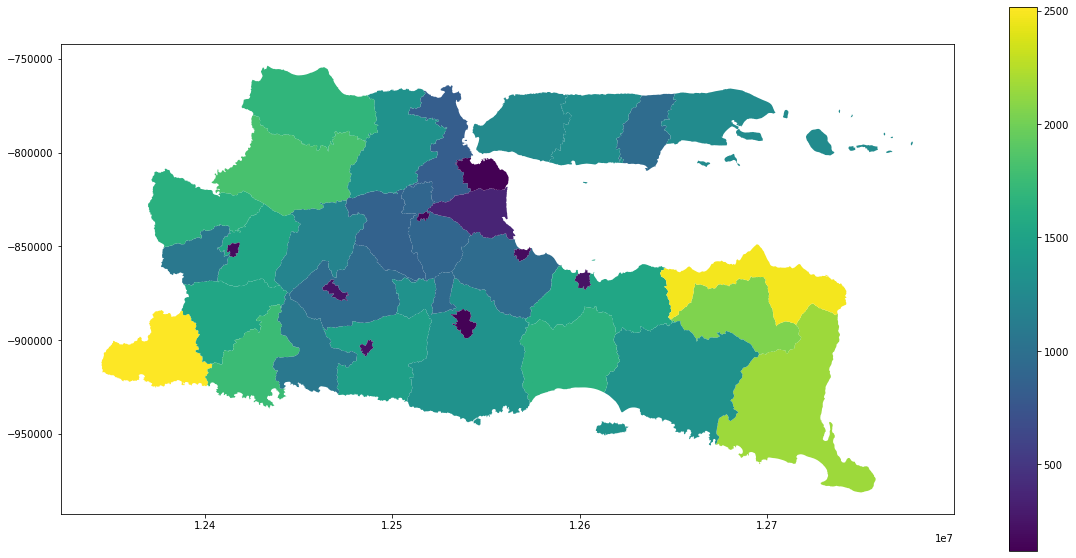

In [24]:
s_kepadatan = gdf.area / df_sensus["Total Jenis Kelamin"]
gdf.plot(
    column =  s_kepadatan,
    legend = True,
    figsize = (20, 10),
)

### Mapping Penduduk yang Tidak Memiliki Jaminan Kesehatan

#### Persentase

<AxesSubplot:>

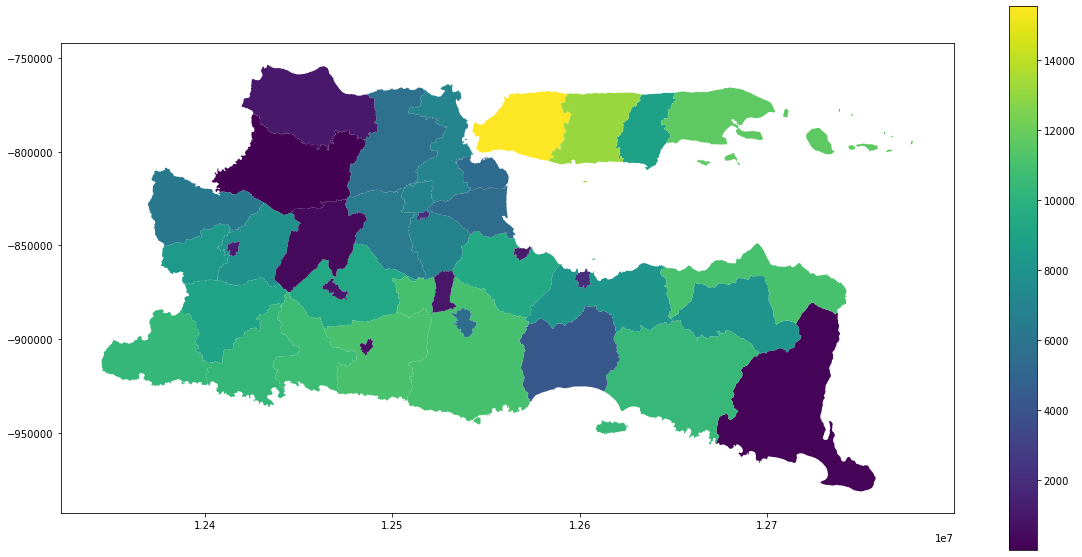

In [25]:
gdf.plot(
    column = df_jakes["Tidak Punya"],
    legend = True,
    figsize = (20, 10),
)

#### Estimasi Dalam Satuan Orang

<AxesSubplot:>

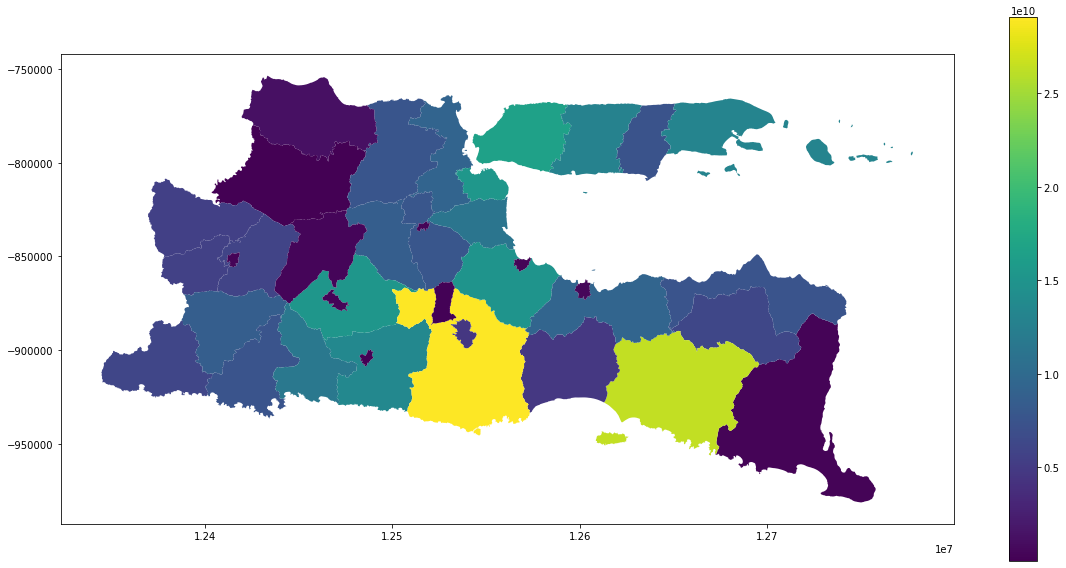

In [26]:
gdf.plot(
    column = df_sensus["Total Jenis Kelamin"] * df_jakes["Tidak Punya"],
    legend = True,
    figsize = (20, 10),
)

### Mapping Penduduk yang Memiliki Jaminan Kesehatan dari Bantuan Negara

#### Persentase

<AxesSubplot:>

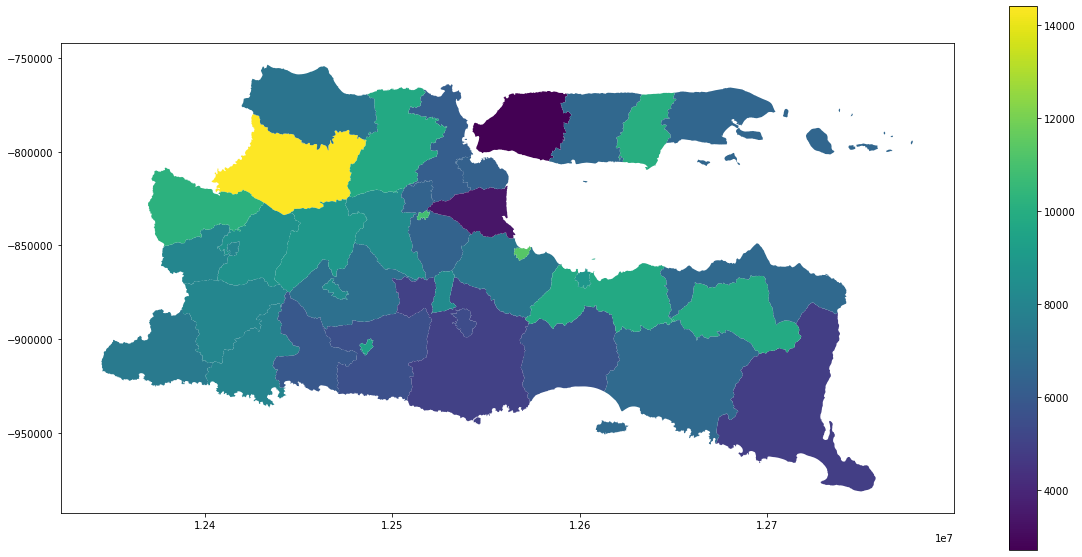

In [27]:
gdf.plot(
    column = df_jakes["Penerima Bantuan Iuran"],
    legend = True,
    figsize = (20, 10),
)

#### Estimasi Dalam Satuan Orang

<AxesSubplot:>

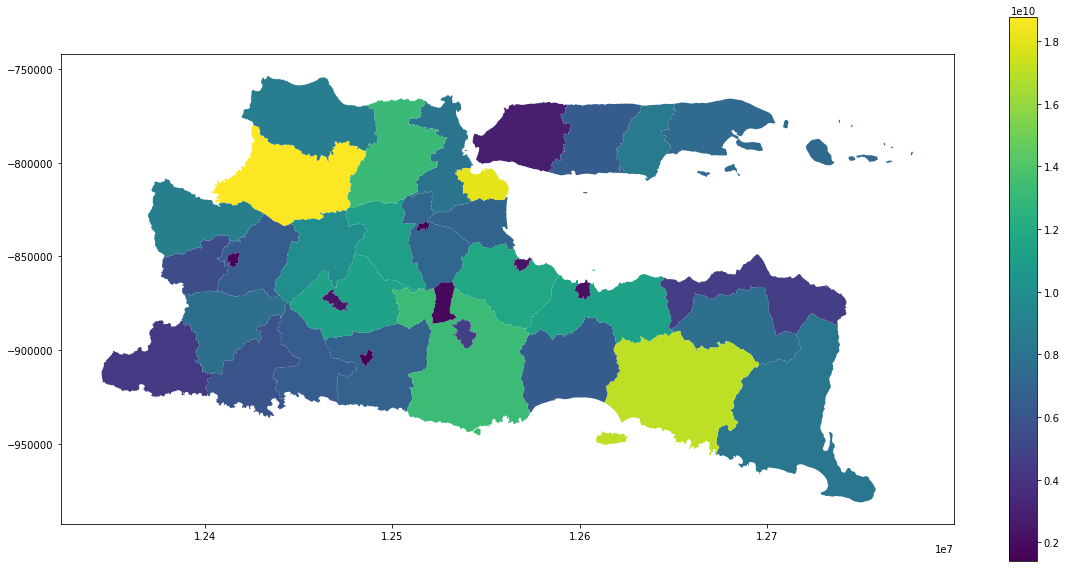

In [28]:
gdf.plot(
    column = df_sensus["Total Jenis Kelamin"] * df_jakes["Penerima Bantuan Iuran"],
    legend = True,
    figsize = (20, 10),
)

### Covid Cases

<AxesSubplot:>

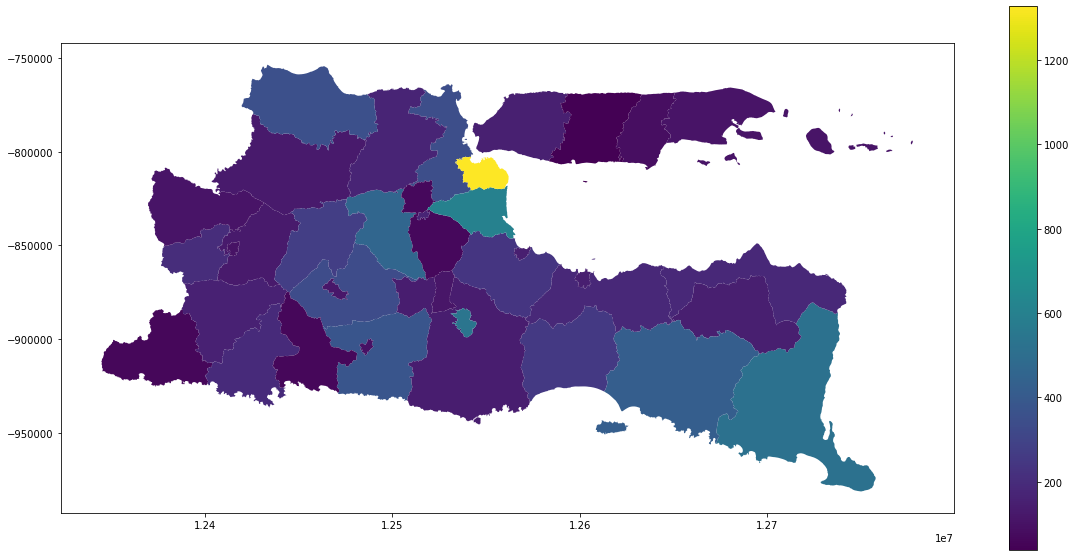

In [29]:
gdf.plot(
    column = df_covid["Meninggal"],
    legend = True,
    figsize = (20, 10),
)

<AxesSubplot:>

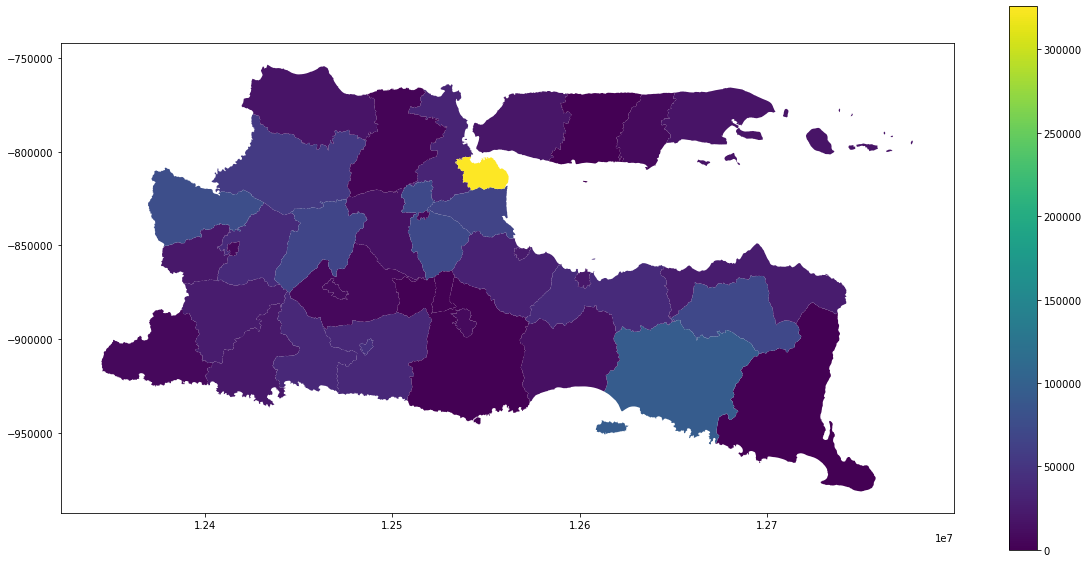

In [30]:
gdf.plot(
    column = df_covid["Rapid"],
    legend = True,
    figsize = (20, 10),
)

### Mapping Penduduk Berdasarkan Kepemilikan Ijazah

#### Persentase

<AxesSubplot:>

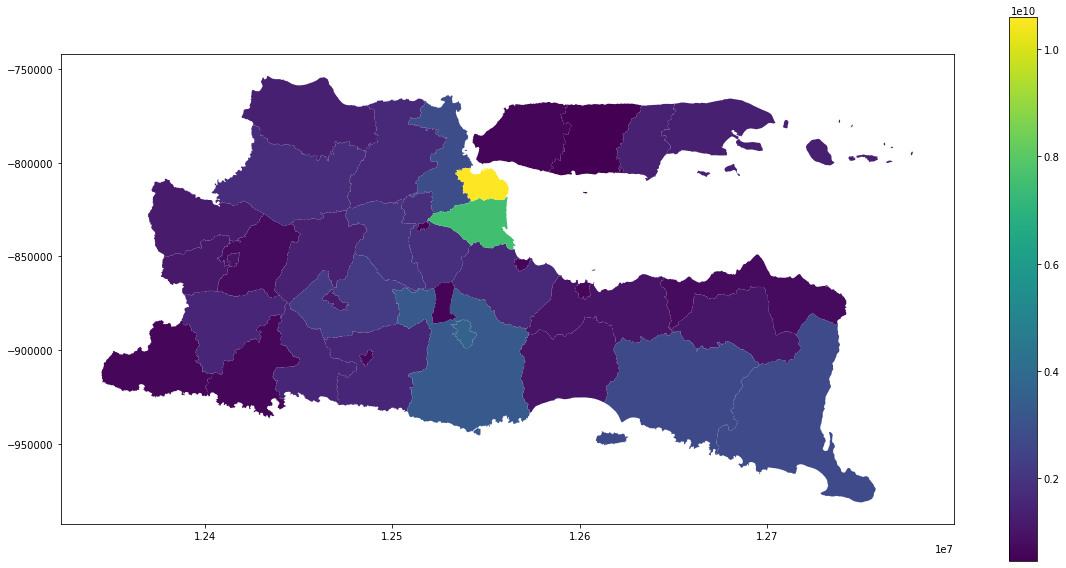

In [31]:
gdf.plot(
    column = (df_ijazah["DIV/S1/S2/S3"] + df_ijazah["Profesi"] + df_ijazah["D1/D2/D3"]) * df_sensus["Total Jenis Kelamin"],
    legend = True,
    figsize = (20, 10),
)

#### Estimasi dalam orang

<AxesSubplot:>

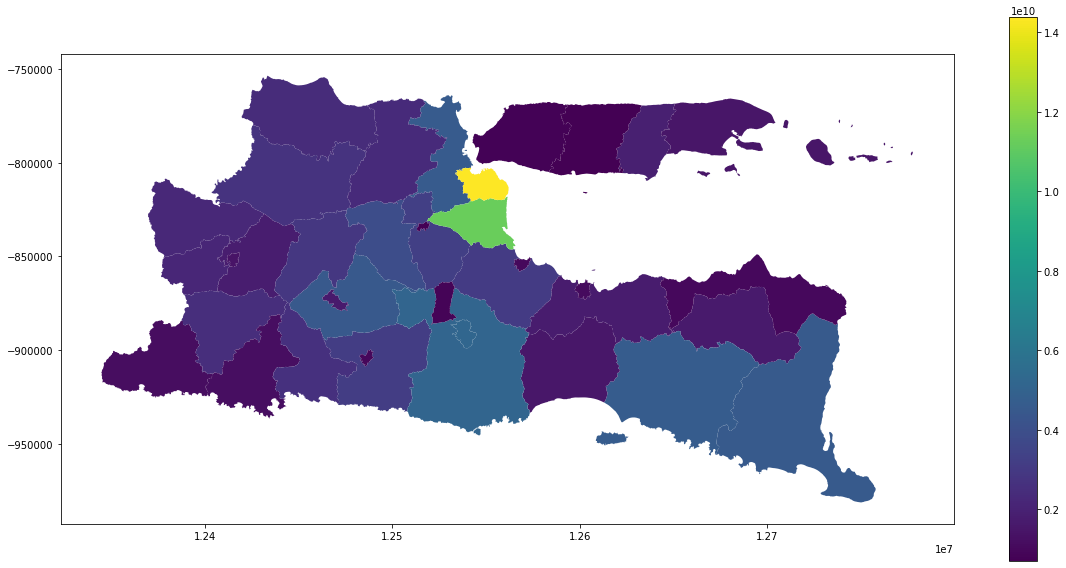

In [32]:
gdf.plot(
    column = (df_ijazah["DIV/S1/S2/S3"] + df_ijazah["Profesi"] + df_ijazah["D1/D2/D3"] + df_ijazah["SMK/MAK"]) * df_sensus["Total Jenis Kelamin"],
    legend = True,
    figsize = (20, 10),
)

### Olah-olah

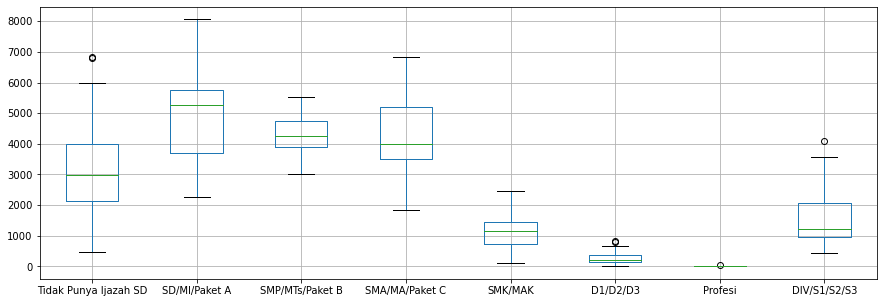

In [33]:
fig = plt.gcf()
fig.set_size_inches((15,5))
ax = fig.add_subplot()
df_ijazah.boxplot(ax=ax)
plt.show()

In [34]:
def outlier(s: pd.Series):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = (q3-q1)
    minn = q1 - 1.5 * iqr
    maxx = q3 + 1.5 * iqr
    
    return s[(s > maxx) | (s < minn)]

In [35]:
df_ijazah_outlier = df_ijazah.loc[:,"Tidak Punya Ijazah SD":].apply(outlier)

In [36]:
df_ijazah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Wilayah                38 non-null     object
 1   Tingkat                38 non-null     object
 2   Tidak Punya Ijazah SD  38 non-null     int64 
 3   SD/MI/Paket A          38 non-null     int64 
 4   SMP/MTs/Paket B        38 non-null     int64 
 5   SMA/MA/Paket C         38 non-null     int64 
 6   SMK/MAK                38 non-null     int64 
 7   D1/D2/D3               38 non-null     int64 
 8   Profesi                38 non-null     int64 
 9   DIV/S1/S2/S3           38 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.1+ KB


In [37]:
df_ijazah.sort_values("Tidak Punya Ijazah SD", ascending=False).head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD,SD/MI/Paket A,SMP/MTs/Paket B,SMA/MA/Paket C,SMK/MAK,D1/D2/D3,Profesi,DIV/S1/S2/S3
4,Bondowoso,Kabupaten,6847,5144,3015,2870,816,69,0,1240
22,Sampang,Kabupaten,6788,6700,3345,2438,260,29,0,440
6,Jember,Kabupaten,5984,5216,3937,3027,777,151,0,907
25,Sumenep,Kabupaten,5727,5666,3756,3513,126,94,12,1106
21,Probolinggo,Kabupaten,5606,6254,3485,3134,673,141,0,707


In [38]:
df_ijazah \
    .iloc[:,:3] \
    .drop(index=df_ijazah_outlier.iloc[:,0].index) \
    .sort_values("Tidak Punya Ijazah SD", ascending=False) \
    .head()

,Wilayah,Tingkat,Tidak Punya Ijazah SD
6,Jember,Kabupaten,5984
25,Sumenep,Kabupaten,5727
21,Probolinggo,Kabupaten,5606
24,Situbondo,Kabupaten,5237
18,Pamekasan,Kabupaten,4828


In [39]:
df_ijazah \
    .iloc[:,:3] \
    .drop(index=df_ijazah_outlier.iloc[:,0].index) \
    .groupby("Tingkat") \
    .mean()

,Tidak Punya Ijazah SD
Tingkat,
Kabupaten,3457.037037
Kota,1578.166667


In [41]:
from statsmodels.tsa import stattools

In [44]:
stattools.acf(df_ijazah["Tidak Punya Ijazah SD"], fft = False, nlags = 20, qstat = True, alpha = 0.95)

(array([ 1.        ,  0.24851783,  0.42700138,  0.42763378,  0.24380844,
         0.04112639,  0.05249579, -0.15533171, -0.25118619, -0.16324791,
        -0.33656109, -0.30452117, -0.15778067, -0.25340898, -0.11098088,
        -0.04949295,  0.04187775, -0.04543255,  0.27528461,  0.0299836 ,
         0.11863513]),
 array([[ 1.        ,  1.        ],
        [ 0.23834545,  0.25869022],
        [ 0.41621903,  0.43778374],
        [ 0.41522438,  0.44004318],
        [ 0.22995784,  0.25765904],
        [ 0.02683859,  0.05541418],
        [ 0.03819575,  0.06679583],
        [-0.16965167, -0.14101174],
        [-0.26567945, -0.23669292],
        [-0.17818487, -0.14831096],
        [-0.35168154, -0.32144065],
        [-0.3203979 , -0.28864445],
        [-0.1742507 , -0.14131064],
        [-0.27003468, -0.23678328],
        [-0.12800157, -0.09396019],
        [-0.06658835, -0.03239754],
        [ 0.02476752,  0.05898797],
        [-0.06255338, -0.02831172],
        [ 0.25815132,  0.29241791],
 